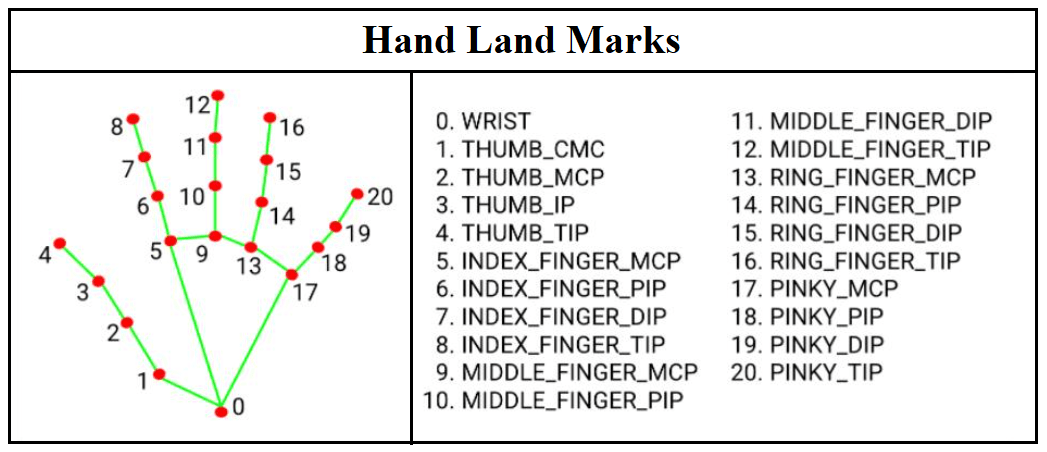

## AI keyboard is ready

## Styling of ai keyboard with the background changer

In [ ]:
import cv2
import cvzone
from cvzone.HandTrackingModule import HandDetector
from time import sleep
import numpy as np
from pynput.keyboard import Controller

cap = cv2.VideoCapture(0, cv2.CAP_DSHOW)
cap.set(3, 1280)
cap.set(4, 720)

detector = HandDetector(detectionCon=0.8)
keyboard_keys = [["Q", "W", "E", "R", "T", "Y", "U", "I", "O", "P"],
                  ["A", "S", "D", "F", "G", "H", "J", "K", "L", ";"],
                  ["Z", "X", "C", "V", "B", "N", "M", ",", ".", "/"]]

final_text = ""

keyboard = Controller()


def draw(img, buttonList):
    for button in buttonList:
        x, y = button.pos
        w, h = button.size
        cvzone.cornerRect(img, (button.pos[0], button.pos[1],
                                                   button.size[0],button.size[0]), 20 ,rt=0)
        cv2.rectangle(img, button.pos, (x + w, y + h),
                      (255, 144, 30), cv2.FILLED)
        cv2.putText(img, button.text, (x + 20, y + 65),
                    cv2.FONT_HERSHEY_PLAIN, 4, (0, 0, 0), 4)
    return img


def transparent_layout(img, buttonList):
    imgNew = np.zeros_like(img, np.uint8)
    for button in buttonList:
        x, y = button.pos
        cvzone.cornerRect(imgNew, (button.pos[0], button.pos[1],
                                                   button.size[0],button.size[0]), 20 ,rt=0)
        cv2.rectangle(imgNew, button.pos, (x + button.size[0], y + button.size[1]),
                                   (255, 144, 30), cv2.FILLED)
        cv2.putText(imgNew, button.text, (x + 20, y + 65),
                    cv2.FONT_HERSHEY_PLAIN, 4, (0, 0, 0), 4)

    out = img.copy()
    alpaha = 0.5
    mask = imgNew.astype(bool)
    print(mask.shape)
    out[mask] = cv2.addWeighted(img, alpaha, imgNew, 1-alpaha, 0)[mask]
    return out


class Button():
    def __init__(self, pos, text, size=[85, 85]):
        self.pos = pos
        self.size = size
        self.text = text


buttonList = []
# mybutton = Button([100, 100], "Q")
for k in range(len(keyboard_keys)):
    for x, key in enumerate(keyboard_keys[k]):
        buttonList.append(Button([100 * x + 25, 100 * k + 50], key))


while True:
    success, img = cap.read()
    img = detector.findHands(img)
    lmList, bboxInfo = detector.findPosition(img)
    img = draw(img, buttonList)  # change the draw funtion to transparent_layout for transparent keys

    if lmList:
        for button in buttonList:
            x, y = button.pos
            w, h = button.size

            if x < lmList[8][0]<x+w and y < lmList[8][1] < y+h:
                cv2.rectangle(img, button.pos, (x + w, y + h),
                              (0, 255, 255), cv2.FILLED)
                cv2.putText(img, button.text, (x + 20, y + 65),
                            cv2.FONT_HERSHEY_PLAIN, 4, (0, 0, 0), 4)
                l, _, _ = detector.findDistance(8,12, img, draw=False)
                print(l)

                if l < 25:
                    keyboard.press(button.text)
                    cv2.rectangle(img, button.pos, (x + w, y + h),
                                  (0, 255, 0), cv2.FILLED)
                    cv2.putText(img, button.text, (x + 20, y + 65),
                                cv2.FONT_HERSHEY_PLAIN, 4, (0, 0, 0), 4)
                    final_text += button.text
                    sleep(0.20)

    cv2.rectangle(img, (25,350), (700, 450),
                  (255, 255, 255), cv2.FILLED)
    cv2.putText(img, final_text, (60, 425),
                cv2.FONT_HERSHEY_PLAIN, 4, (0, 0, 0), 4)

    # cv2.rectangle(img, (100,100), (200,200),
    #               (100, 255, 0), cv2.FILLED)
    # cv2.putText(img, 'Q', (120,180), cv2.FONT_HERSHEY_PLAIN, 5,
    #             (0, 0, 0), 5)

    # img = mybutton.draw(img)
    cv2.imshow("output", img)
    cv2.waitKey(1) 